In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Importing Dataset

In [140]:
df = pd.read_csv("lending_club_loan_dataset.csv.zip")
df

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6595657,B,27000.0,0,9,RENT,18.36,debt_consolidation,36 months,1,NaN,46.5,0.0,0.821782,1
19996,1576331,B,45000.0,0,2,MORTGAGE,23.22,major_purchase,36 months,0,NaN,46.2,0.0,0.652200,0
19997,6645736,B,104000.0,0,5,MORTGAGE,13.27,debt_consolidation,36 months,1,NaN,78.5,0.0,0.482555,0
19998,6625736,A,38400.0,0,2,MORTGAGE,12.84,debt_consolidation,36 months,0,NaN,47.4,0.0,0.822980,0


# Pre-Processing

In [141]:
df.head()
df = df.drop('id', axis = 1)


In [142]:
df.isnull().sum()

grade                        0
annual_inc                   0
short_emp                    0
emp_length_num               0
home_ownership            1491
dti                        154
purpose                      0
term                         0
last_delinq_none             0
last_major_derog_none    19426
revol_util                   0
total_rec_late_fee           0
od_ratio                     0
bad_loan                     0
dtype: int64

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  20000 non-null  object 
 1   annual_inc             20000 non-null  float64
 2   short_emp              20000 non-null  int64  
 3   emp_length_num         20000 non-null  int64  
 4   home_ownership         18509 non-null  object 
 5   dti                    19846 non-null  float64
 6   purpose                20000 non-null  object 
 7   term                   20000 non-null  object 
 8   last_delinq_none       20000 non-null  int64  
 9   last_major_derog_none  574 non-null    float64
 10  revol_util             20000 non-null  float64
 11  total_rec_late_fee     20000 non-null  float64
 12  od_ratio               20000 non-null  float64
 13  bad_loan               20000 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 2.1+ 

We see that there are quite a lot of null data.

In [144]:
df = df.dropna(subset = ['dti'])
df = df.dropna(subset = ['home_ownership'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18371 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  18371 non-null  object 
 1   annual_inc             18371 non-null  float64
 2   short_emp              18371 non-null  int64  
 3   emp_length_num         18371 non-null  int64  
 4   home_ownership         18371 non-null  object 
 5   dti                    18371 non-null  float64
 6   purpose                18371 non-null  object 
 7   term                   18371 non-null  object 
 8   last_delinq_none       18371 non-null  int64  
 9   last_major_derog_none  524 non-null    float64
 10  revol_util             18371 non-null  float64
 11  total_rec_late_fee     18371 non-null  float64
 12  od_ratio               18371 non-null  float64
 13  bad_loan               18371 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 2.1+ 

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13936\4062199650.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = 'seismic')


<Axes: >

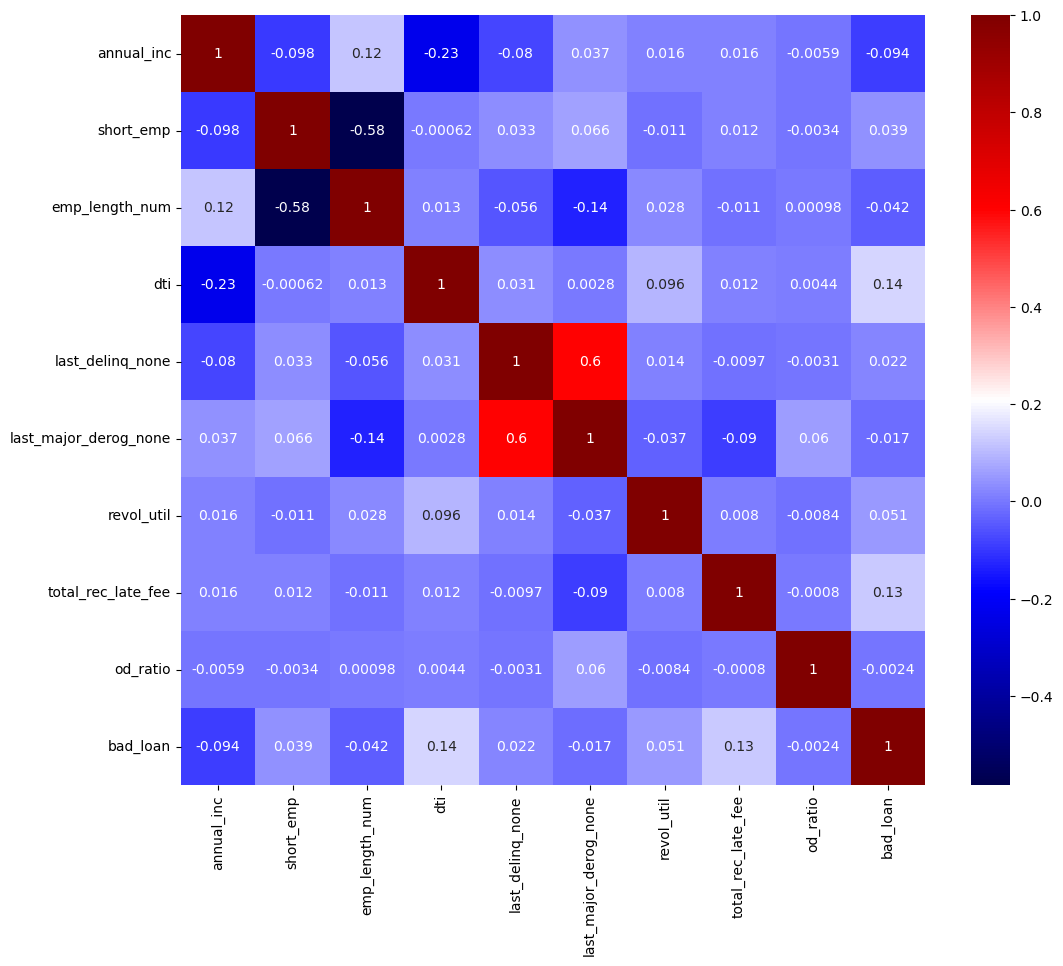

In [145]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True, cmap = 'seismic')

Fill in the missing values in the "last_major_derog_none" column with a value such as moda

In [146]:
#df = df.drop('last_major_derog_none', axis = 1)
#df = df.dropna(subset = ['last_major_derog_none'])

df['last_major_derog_none'] = df['last_major_derog_none'].fillna(df['last_major_derog_none'].mode()[0])

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18371 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   grade                  18371 non-null  object 
 1   annual_inc             18371 non-null  float64
 2   short_emp              18371 non-null  int64  
 3   emp_length_num         18371 non-null  int64  
 4   home_ownership         18371 non-null  object 
 5   dti                    18371 non-null  float64
 6   purpose                18371 non-null  object 
 7   term                   18371 non-null  object 
 8   last_delinq_none       18371 non-null  int64  
 9   last_major_derog_none  18371 non-null  float64
 10  revol_util             18371 non-null  float64
 11  total_rec_late_fee     18371 non-null  float64
 12  od_ratio               18371 non-null  float64
 13  bad_loan               18371 non-null  int64  
dtypes: float64(6), int64(4), object(4)
memory usage: 2.1+ 

<Axes: xlabel='bad_loan', ylabel='count'>

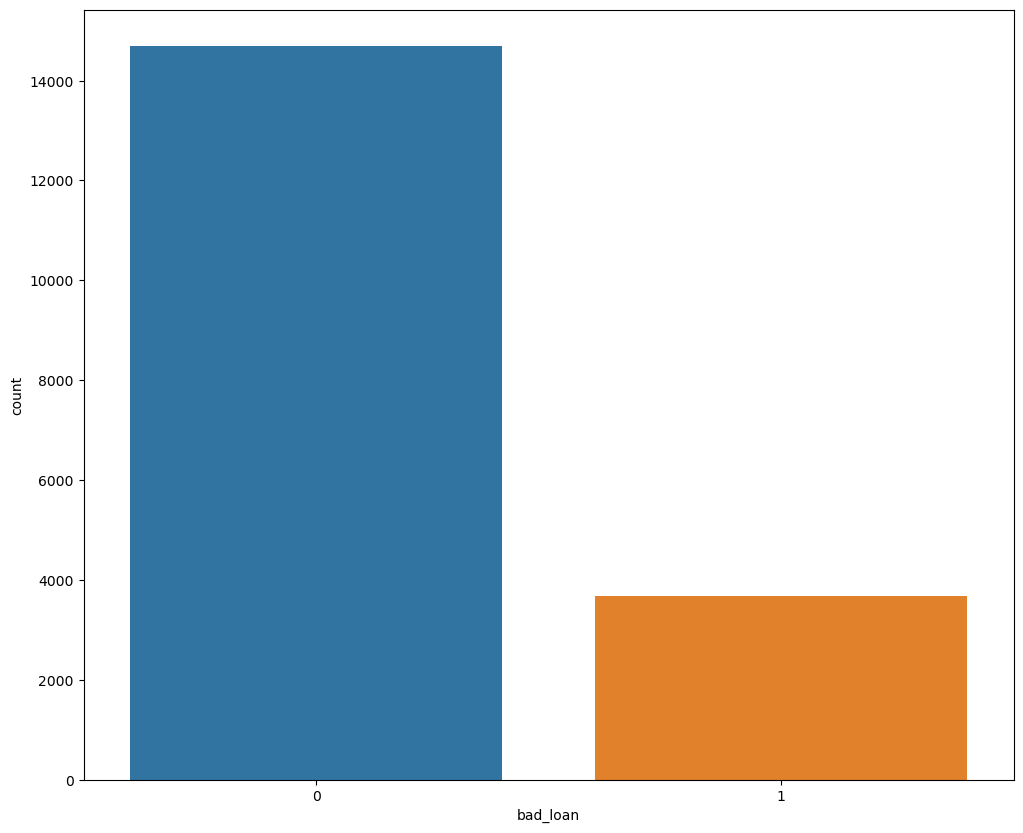

In [148]:
plt.figure(figsize=(12,10))
sns.countplot(x = 'bad_loan', data = df)

We see that our sample is unbalanced... 

In [149]:
df.columns

Index(['grade', 'annual_inc', 'short_emp', 'emp_length_num', 'home_ownership',
       'dti', 'purpose', 'term', 'last_delinq_none', 'last_major_derog_none',
       'revol_util', 'total_rec_late_fee', 'od_ratio', 'bad_loan'],
      dtype='object')

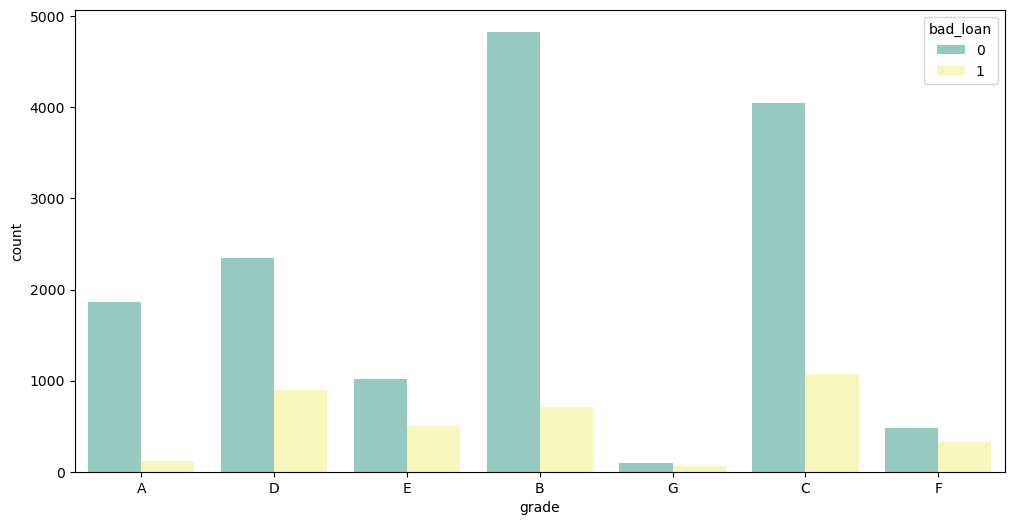

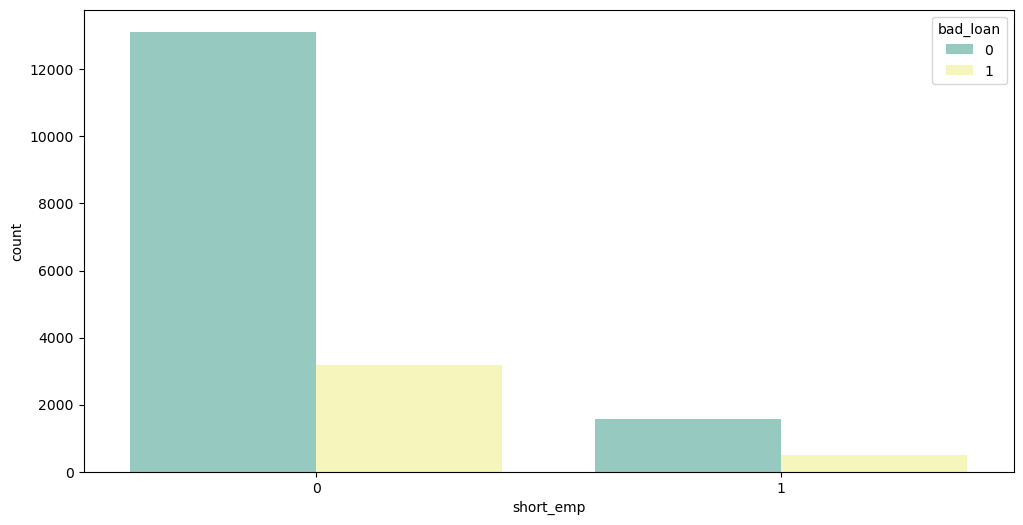

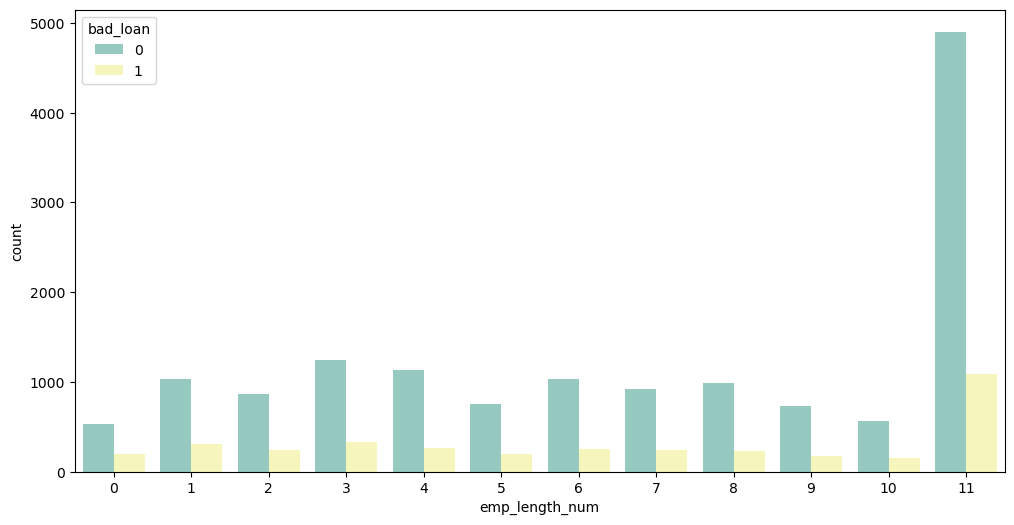

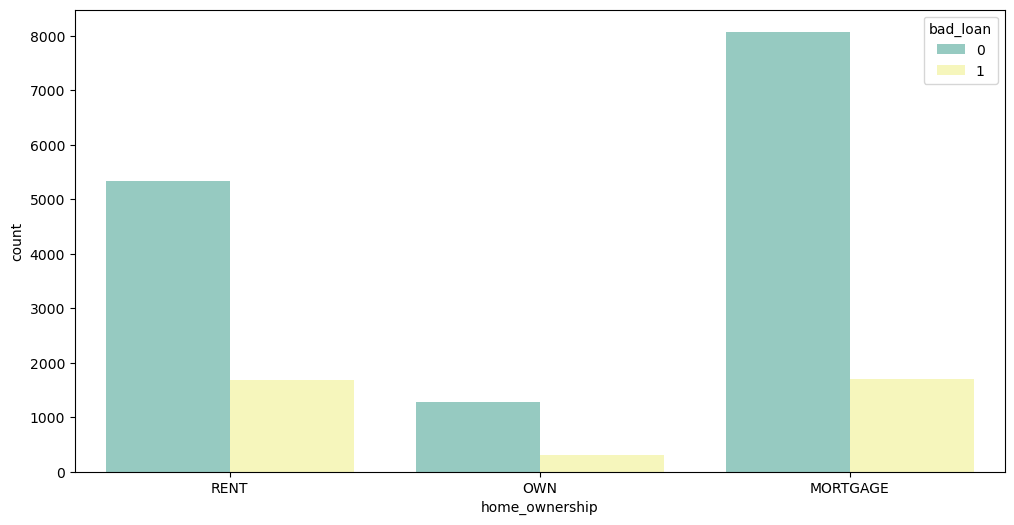

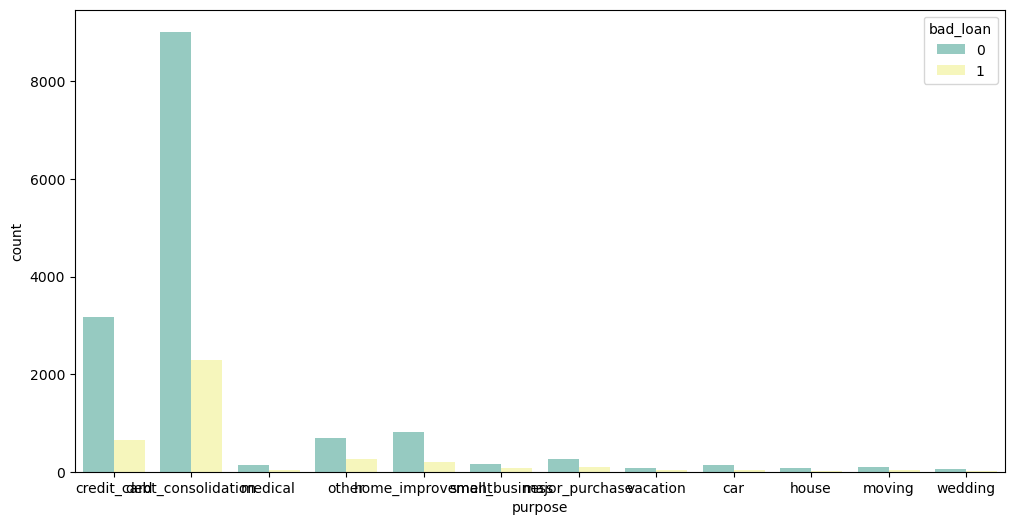

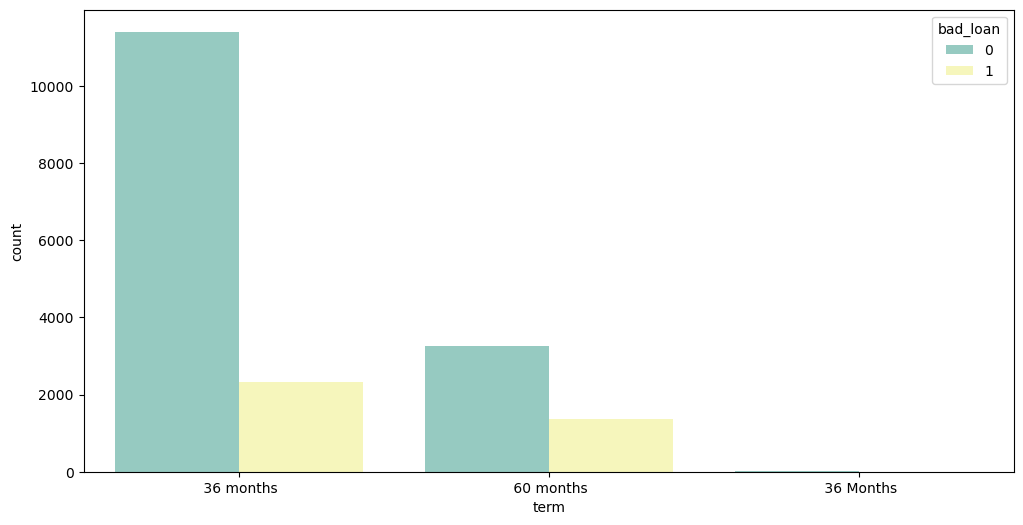

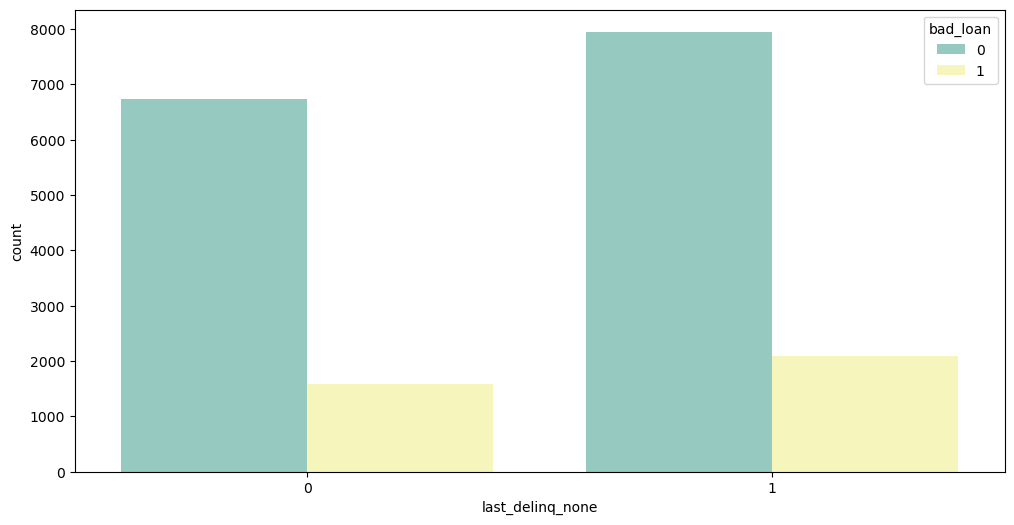

In [150]:
features = ['grade',  'short_emp', 'emp_length_num', 'home_ownership',
            'purpose', 'term', 'last_delinq_none']
for f in features:
    plt.figure(figsize = (12,6))
    sns.countplot(x = f, data = df, palette = 'Set3', hue = 'bad_loan')
    plt.show()

In [151]:
for column in df:
    unique_val = np.unique(df[column])
    nr_val = len(unique_val)
    if nr_val < 12:
        print('The number of values for feature {} : {} -- :{}'.format(column, nr_val, unique_val))
    else:
        print('The number of values for feature {} : {}'.format(column, nr_val)) 

The number of values for feature grade : 7 -- :['A' 'B' 'C' 'D' 'E' 'F' 'G']
The number of values for feature annual_inc : 2401
The number of values for feature short_emp : 2 -- :[0 1]
The number of values for feature emp_length_num : 12
The number of values for feature home_ownership : 3 -- :['MORTGAGE' 'OWN' 'RENT']
The number of values for feature dti : 3263
The number of values for feature purpose : 12
The number of values for feature term : 3 -- :[' 36 Months' ' 36 months' ' 60 months']
The number of values for feature last_delinq_none : 2 -- :[0 1]
The number of values for feature last_major_derog_none : 2 -- :[0. 1.]
The number of values for feature revol_util : 1028
The number of values for feature total_rec_late_fee : 153
The number of values for feature od_ratio : 18371
The number of values for feature bad_loan : 2 -- :[0 1]


*Since there are a lot of categorical variables in our dataframe, we will slightly transform our table to make it easier for us to work with it.*

In [152]:
new_df = pd.get_dummies(df, columns = ['grade', 'home_ownership', 'term', 'purpose', 'emp_length_num'])

In [153]:
new_df.head()

,annual_inc,short_emp,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan,grade_A,...,emp_length_num_2,emp_length_num_3,emp_length_num_4,emp_length_num_5,emp_length_num_6,emp_length_num_7,emp_length_num_8,emp_length_num_9,emp_length_num_10,emp_length_num_11
0,100000.0,1,26.27,1,1.0,43.2,0.0,0.160624,0,1,...,0,0,0,0,0,0,0,0,0,0
1,83000.0,0,5.39,0,1.0,21.5,0.0,0.810777,0,1,...,0,0,1,0,0,0,0,0,0,0
2,78000.0,0,18.45,1,1.0,46.3,0.0,0.035147,1,0,...,0,0,0,0,0,0,0,0,0,1
3,37536.0,0,12.28,0,1.0,10.7,0.0,0.534887,1,0,...,0,0,0,0,1,0,0,0,0,0
4,65000.0,0,11.26,0,1.0,15.2,0.0,0.166500,0,0,...,0,0,0,0,0,0,0,0,0,1


In [154]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18371 entries, 0 to 19999
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   annual_inc                  18371 non-null  float64
 1   short_emp                   18371 non-null  int64  
 2   dti                         18371 non-null  float64
 3   last_delinq_none            18371 non-null  int64  
 4   last_major_derog_none       18371 non-null  float64
 5   revol_util                  18371 non-null  float64
 6   total_rec_late_fee          18371 non-null  float64
 7   od_ratio                    18371 non-null  float64
 8   bad_loan                    18371 non-null  int64  
 9   grade_A                     18371 non-null  uint8  
 10  grade_B                     18371 non-null  uint8  
 11  grade_C                     18371 non-null  uint8  
 12  grade_D                     18371 non-null  uint8  
 13  grade_E                     183

In [155]:
rat = len(new_df.loc[new_df['bad_loan']==0]) // len(new_df.loc[new_df['bad_loan']==1])

df_1 = new_df.loc[new_df['bad_loan']==1]
df_1 = df_1.loc[df_1.index.repeat(rat)]
train_n = pd.concat([new_df.loc[new_df['bad_loan']==0], df_1]).sample(frac=1)

In [156]:
train_n['bad_loan'].value_counts()

0    14688
1    11049
Name: bad_loan, dtype: int64

# Splitting dataset into train and test data

In [157]:
X = train_n.drop('bad_loan', axis = 1).values
y = train_n['bad_loan'].values

In [158]:
print(X.shape, y.shape)

(25737, 45) (25737,)


In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)


# Build Model

In [160]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.predict(X_train)
y_pred = lr.predict(X_train)

pred_proba = lr.predict_proba(X_train)


print('The training accuracy is ', lr.score(X_train, y_train))
print('The testing accuracy is ', lr.score(X_test, y_test))

print(classification_report(y_train, y_pred))

The training accuracy is  0.6042061294866191
The testing accuracy is  0.6074203574203574
              precision    recall  f1-score   support

           0       0.62      0.80      0.70     11697
           1       0.57      0.35      0.43      8892

    accuracy                           0.60     20589
   macro avg       0.59      0.57      0.56     20589
weighted avg       0.60      0.60      0.58     20589



In [161]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

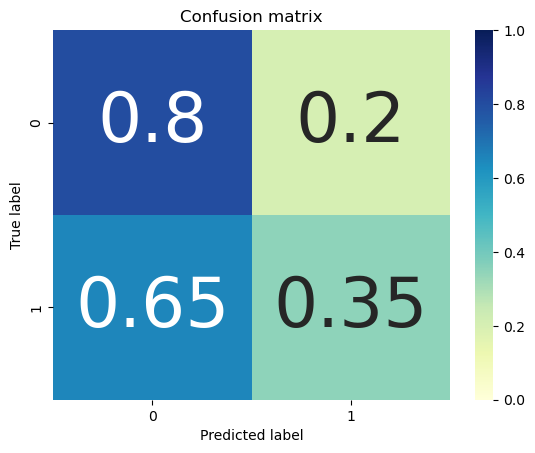

In [162]:
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = lr.classes_, title='Confusion matrix')

:( The result is not as good as it could be....Let's try a random forest, maybe the results will be a little better!

In [163]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
rf = RandomForestClassifier(criterion='entropy', n_estimators = 20)

In [165]:
rf.fit(X_train, y_train)
rf_prediction_test = rf.predict(X_test)

# Accuracy

In [166]:
print('The training accuracy is ', rf.score(X_train, y_train))
print('The testing accuracy is ', rf.score(X_test, y_test))

The training accuracy is  0.999757151877216
The testing accuracy is  0.918997668997669


# confusion metrix

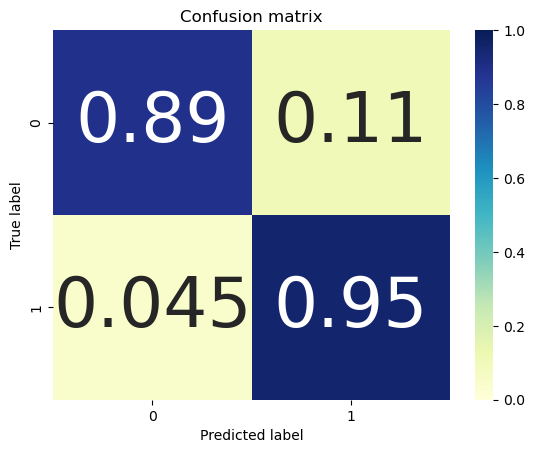

In [167]:
cm = confusion_matrix(y_test, rf_prediction_test)
cm_norm = cm / cm.sum(axis = 1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes = rf.classes_)